In [1]:
import pandas as pd
import numpy as np

import math

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from IPython.display import Audio

import keras
from keras import Model
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D,MaxPooling2D, Flatten, Dropout, BatchNormalization, InputLayer, Input, Reshape, Concatenate,AveragePooling1D
from keras.callbacks import ModelCheckpoint

In [2]:
def rolling_avg(df,size):
    new_df = df.copy()
    for i in range(len(df)):
        if i < size:
            sum = 0
            for j in range(i+1):
                sum += df.iloc[j]
                print(sum)
            new_df.iloc[i] = sum /(i+1)
        else:
            sum = 0
            for j in range(i-4,i+1):
                sum += df.iloc[j]
            new_df.iloc[i] = sum/size
    return new_df
            

In [3]:
baseline = pd.read_csv("consolidated_model_logs/baseline_model_log.csv")
untrainable = pd.read_csv("consolidated_model_logs/consolidated_untrainable_log.csv")
trainable = pd.read_csv("consolidated_model_logs/consolidated_trainable_log.csv")
uninitialized = pd.read_csv("consolidated_model_logs/consolidated_uninitialized_log.csv")

In [4]:
baseline = rolling_avg(baseline,5)*100
untrainable = rolling_avg(untrainable,5)*100
trainable = rolling_avg(trainable,5)*100
uninitialized = rolling_avg(uninitialized,5)*100

loss            1.710220
accuracy        0.308741
val_loss        1.758021
val_accuracy    0.295870
lr              0.000500
Name: 0, dtype: float64
loss            1.710220
accuracy        0.308741
val_loss        1.758021
val_accuracy    0.295870
lr              0.000500
Name: 0, dtype: float64
loss            3.181662
accuracy        0.727639
val_loss        3.586352
val_accuracy    0.627650
lr              0.001000
Name: 0, dtype: float64
loss            1.710220
accuracy        0.308741
val_loss        1.758021
val_accuracy    0.295870
lr              0.000500
Name: 0, dtype: float64
loss            3.181662
accuracy        0.727639
val_loss        3.586352
val_accuracy    0.627650
lr              0.001000
Name: 0, dtype: float64
loss            4.516532
accuracy        1.203047
val_loss        5.641256
val_accuracy    0.904971
lr              0.001500
Name: 0, dtype: float64
loss            1.710220
accuracy        0.308741
val_loss        1.758021
val_accuracy    0.295870
lr    

In [5]:
baseline = baseline.iloc[:70,:]
untrainable = untrainable.iloc[:70,:]
trainable = trainable.iloc[:70,:]
uninitialized = uninitialized.iloc[:70,:]

Text(0, 0.5, 'Validation Accuracy')

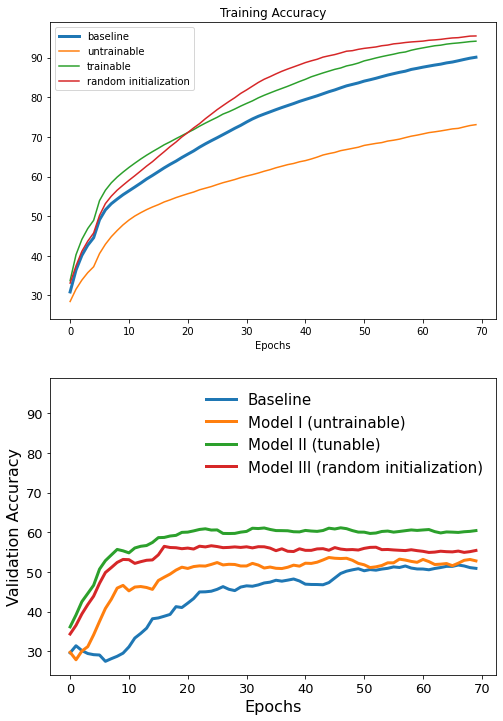

In [6]:
epochs = [i for i in range(70)]
fig , ax = plt.subplots(2,1,sharey=True)
baseline_test_loss = baseline['val_accuracy']
untrainable_test_loss = untrainable['val_accuracy']
trainable_test_loss = trainable['val_accuracy']
uninitialized_test_loss = uninitialized['val_accuracy']

baseline_loss = baseline['accuracy']
untrainable_loss = untrainable['accuracy']
trainable_loss = trainable['accuracy']
uninitialized_loss = uninitialized['accuracy']

fig.set_size_inches(8,12)

ax[0].plot(epochs , baseline_loss , label = 'baseline',linewidth=3)
ax[0].plot(epochs , untrainable_loss , label = 'untrainable')
ax[0].plot(epochs , trainable_loss , label = 'trainable')
ax[0].plot(epochs , uninitialized_loss , label = 'random initialization')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , baseline_test_loss , label = 'Baseline',linewidth=3)
ax[1].plot(epochs , untrainable_test_loss , label = 'Model I (untrainable)',linewidth=3)
ax[1].plot(epochs , trainable_test_loss , label = 'Model II (tunable)',linewidth=3)
ax[1].plot(epochs , uninitialized_test_loss , label = 'Model III (random initialization)',linewidth=3)
ax[1].tick_params(axis='both',labelsize=13)
ax[1].legend(frameon=False,fontsize=15)
ax[1].set_xlabel("Epochs",fontsize=16)
ax[1].set_ylabel("Validation Accuracy",fontsize=16)

In [8]:
baseline = baseline/100
untrainable = untrainable/100
trainable = trainable/100
uninitialized = uninitialized/100

Text(0, 0.5, 'Validation Loss')

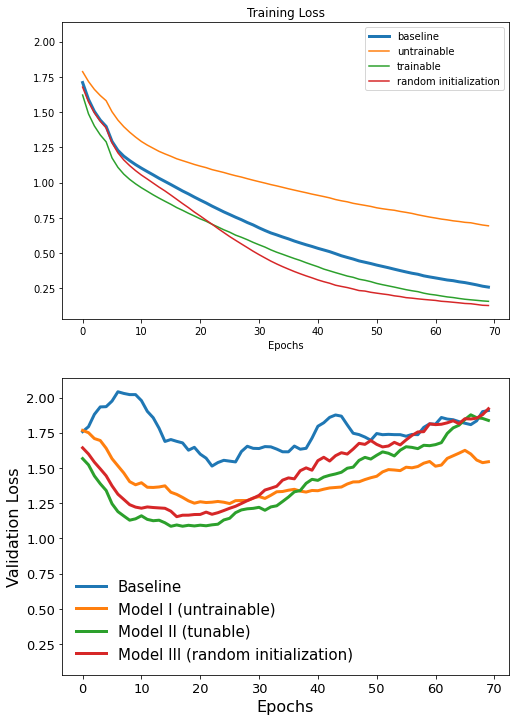

In [9]:
epochs = [i for i in range(70)]
fig , ax = plt.subplots(2,1,sharey=True)
baseline_test_loss = baseline['val_loss']
untrainable_test_loss = untrainable['val_loss']
trainable_test_loss = trainable['val_loss']
uninitialized_test_loss = uninitialized['val_loss']

baseline_loss = baseline['loss']
untrainable_loss = untrainable['loss']
trainable_loss = trainable['loss']
uninitialized_loss = uninitialized['loss']

fig.set_size_inches(8,12)

ax[0].plot(epochs , baseline_loss , label = 'baseline',linewidth=3)
ax[0].plot(epochs , untrainable_loss , label = 'untrainable')
ax[0].plot(epochs , trainable_loss , label = 'trainable')
ax[0].plot(epochs , uninitialized_loss , label = 'random initialization')
ax[0].set_title('Training Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , baseline_test_loss , label = 'Baseline',linewidth=3)
ax[1].plot(epochs , untrainable_test_loss , label = 'Model I (untrainable)',linewidth=3)
ax[1].plot(epochs , trainable_test_loss , label = 'Model II (tunable)',linewidth=3)
ax[1].plot(epochs , uninitialized_test_loss , label = 'Model III (random initialization)',linewidth=3)
ax[1].tick_params(axis='both',labelsize=13)
ax[1].legend(frameon=False,fontsize=15)
ax[1].set_xlabel("Epochs",fontsize=16)
ax[1].set_ylabel("Validation Loss",fontsize=16)